In [1]:
#Imports
import pandas as pd
import numpy as np

#Import visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_excel('credit_card_defaults.xls')
df.head(4)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


<b>As we can see from the above cell, the columns of the dataframe are not properly labelled. We will have to do a little bit of cleaning, one step at a time.</b>

In [3]:
df.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       'X20', 'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [4]:
df.iloc[0].head(6)

Unnamed: 0           ID
X1            LIMIT_BAL
X2                  SEX
X3            EDUCATION
X4             MARRIAGE
X5                  AGE
Name: 0, dtype: object

<b>We'll remove the present columns and replace them with the values  of the first row in the dataframe</b>

In [5]:
df.columns = df.iloc[0]
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [6]:
df.head(4)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


<b>As we've successfully changed the names of the columns, we'll drop the first row of the dataframe.</b>

In [7]:
df.describe().T

,count,unique,top,freq
0,,,,
ID,30001,30001,6800,1
LIMIT_BAL,30001,82,50000,3365
SEX,30001,3,2,18112
EDUCATION,30001,8,2,14030
MARRIAGE,30001,5,2,15964
AGE,30001,57,29,1605
PAY_0,30001,12,0,14737
PAY_2,30001,12,0,15730
PAY_3,30001,12,0,15764


In [8]:
df = df.drop(index=0)

In [9]:
assert(df.index == df['ID']).all(), \
'The index is not the same as the ID column'

In [10]:
# Since the ID columns is the same as the index, well drop it as it won't be useful in our analysis
df.drop(labels=['ID'], axis=1, inplace=True)

In [11]:
df.columns = df.columns.str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [12]:
def convert(data):
    for col in data.columns:
        data[col] = data[col].astype('int64')
    return data
df = convert(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_bal                   30000 non-null  int64
 1   sex                         30000 non-null  int64
 2   education                   30000 non-null  int64
 3   marriage                    30000 non-null  int64
 4   age                         30000 non-null  int64
 5   pay_0                       30000 non-null  int64
 6   pay_2                       30000 non-null  int64
 7   pay_3                       30000 non-null  int64
 8   pay_4                       30000 non-null  int64
 9   pay_5                       30000 non-null  int64
 10  pay_6                       30000 non-null  int64
 11  bill_amt1                   30000 non-null  int64
 12  bill_amt2                   30000 non-null  int64
 13  bill_amt3                   30000 non-null  int64
 14  bill_a

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [15]:
df.isnull().sum().sum()

0

#### DATA PREPROCESSING

Let's look at the unique values in the columns. The motive behind looking at unique values in a column is to identify the subcategory in each column.

In [16]:
df.columns = df.columns.str.lower()
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object', name=0)

In [17]:
#Finding unique values in the SEX column
print('Sex ' + str(sorted(df['sex'].unique()[1:])))

Sex [1]


In [18]:
#Findning unique values in the EDUCATION column
print('Education ' + str(sorted(df['education'].unique())))

Education [0, 1, 2, 3, 4, 5, 6]


In [19]:
#Finding the unqiue values in the MARRIAGE column
print('Marriage ' + str(sorted(df['marriage'].unique())))

Marriage [0, 1, 2, 3]


In [20]:
#Unique values from the Pay_0 column
print('Pay_0 ' + str(sorted(df['pay_0'].unique())))

Pay_0 [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


In [21]:
print('default.payment.next.month ' \
+ str(sorted(df['default payment next month'].unique())))

default.payment.next.month [0, 1]


In [22]:
"""The EDUCATION column has 7 unique values, but as per our data description,
   we have only 4 unique values, so we are going to club categories 0, 5, and 6 with category 4:"""
fill = (df.education==0) | (df.education==5) | (df.education==6)
df.loc[fill, 'education'] = 4
print('Education ' + str(sorted(df['education'].unique())))

Education [1, 2, 3, 4]


In [23]:
df.head(4)

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [24]:
"""Similarly, in the MARRIAGE column, according to the data description, we should
have 3 unique values. But here, we have 4 values in our data. As per our data
description, the MARRIAGE column should have three subcategories. So, we combine
category 0 with category 2 (Single):"""
fill = (df.marriage == 0)
df.loc[fill, 'marriage'] = 2
print('Marriage ' + str(sorted(df['marriage'].unique())))

Marriage [1, 2, 3]


In [25]:
df = df.rename(mapper={'default payment next month':'default', 'pay_0':'pay_1'}, axis=1 )
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default'],
      dtype='object', name=0)

#### Exploratory Data Analysis

#### Univariate Analysis

Univariate analysis is the simplest form of analysis where we analyze each feature (that is, each column of a DataFrame) and try to uncover the pattern or distribution of the data. We'll be analyzing categorical features(default, sex, education and marriage.)

In [26]:
df.head(3)

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


Let's begin with each of the variables one by one

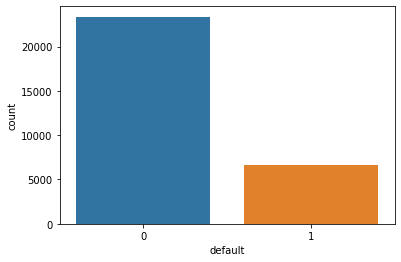

<Figure size 648x360 with 0 Axes>

In [27]:
#The default column
sns.countplot(x='default', data=df)
plt.figure(figsize=(9,5));

In [28]:
df['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [29]:
(df['default'].value_counts() * 100)/30000

0    77.88
1    22.12
Name: default, dtype: float64

<b>From the preceding output, we see that around <i>6636</i> customers have defaulted out of <i>30,000</i> people, which is around <i>22%</i>.</b>

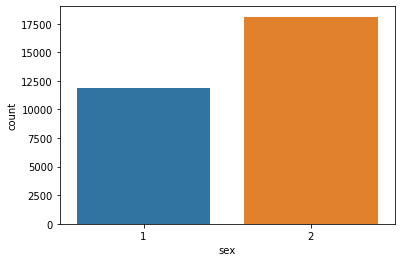

In [30]:
#The sex column
sns.countplot(x='sex', data=df);

<b>In the preceding output, 1 represents male and 2 represents female.</b>

In [31]:
df.sex.value_counts()

2    18112
1    11888
Name: sex, dtype: int64

In [32]:
(df.sex.value_counts()*100)/30000

2    60.373333
1    39.626667
Name: sex, dtype: float64

<b>From the preceding output, there are 18112 female(about 60%) and 11888 male(approximately 40%) in the dataset.</b>

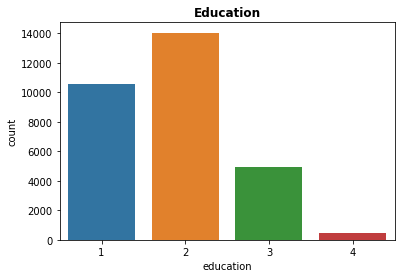

In [33]:
#The education column
sns.countplot(x='education', data=df)
plt.title("Education", weight='bold');

<b>From the preceding output, 1=Graduate School, 2=University, 3=High School, 4=Others which represents the highest qualification of customers.</b>

In [34]:
df.education.value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [35]:
(df.education.value_counts()*100)/30000

2    46.766667
1    35.283333
3    16.390000
4     1.560000
Name: education, dtype: float64

<b>From the preceding outputs, most of the customers either went to University or Graduate school.</b>

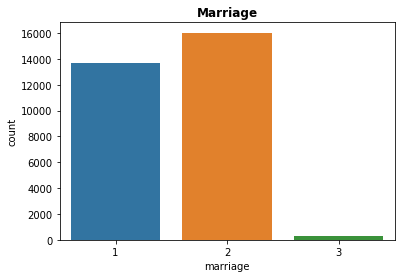

In [36]:
#The marriage column
sns.countplot(x='marriage', data=df)
plt.title("Marriage", weight='bold');

<b>In the preceding output, 1=Married, 2=Single, 3=Divorced. These represent the marital status of customers.</b>

In [37]:
df.marriage.value_counts()

2    16018
1    13659
3      323
Name: marriage, dtype: int64

<b>From the preceding output, most of the customers are Single and Married people.</b>

#### Bivariate Analysis

Bivariate analysis is performed between two variables to look at their relationship.

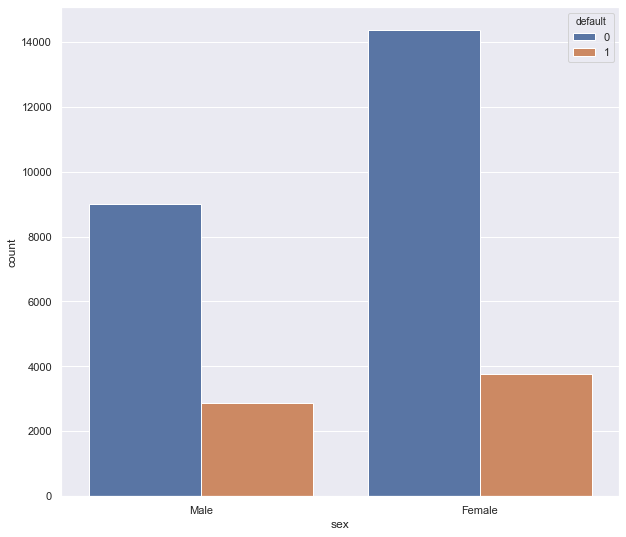

In [38]:
""" We'll be seeing the relationship between the sex and default column to know compare 
    the number of male customers who have defaulted to the number of female customers that
    have also defaulted."""
sns.set(rc={'figure.figsize':(10,9)})
edu = sns.countplot(x='sex', hue='default', data=df)
edu.set_xticklabels(['Male','Female'])
plt.show()

<b>From the preceding output, we can see that more females have defaulted compared to the males, this graph does not give us the complete picture as there are more female customers than male customers.</b>

In [39]:
pd.crosstab(df.sex, df.default, margins=True)

default,0,1,All
sex,,,
1,9015,2873,11888
2,14349,3763,18112
All,23364,6636,30000


In [40]:
pd.crosstab(df.sex, df.default, normalize='index', margins=True)

default,0,1
sex,,
1,0.758328,0.241672
2,0.792237,0.207763
All,0.778800,0.221200


<b>The preceding output tells us that 24% of male customers have defaulted while 20% of female customers have defaulted.</b>

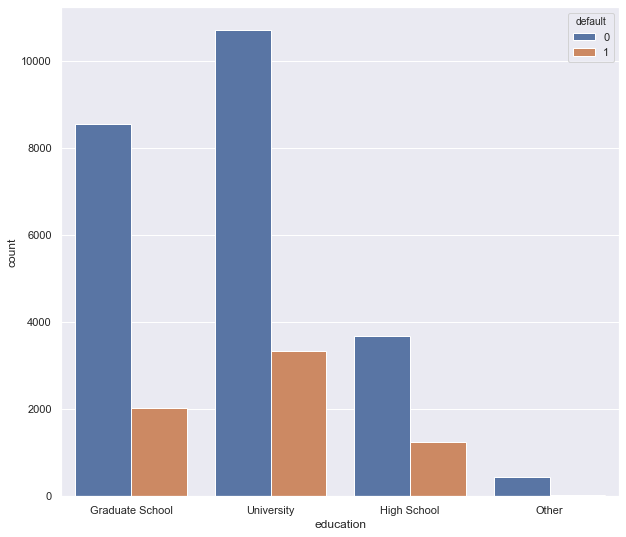

In [41]:
# The education and default column
edu = sns.countplot(x='education', hue='default', data=df)
edu.set_xticklabels(['Graduate School','University', 'High School','Other'])
plt.show()

<b>From the preceding output, the customers that went to University have defaulted the most followed by the ones who attended Graduate school. This graph does not tell the whole story, therefore we'll need to check the actual values and percentage.</b>

In [42]:
pd.crosstab(df.education, df.default, margins=True)

default,0,1,All
education,,,
1,8549,2036,10585
2,10700,3330,14030
3,3680,1237,4917
4,435,33,468
All,23364,6636,30000


In [43]:
pd.crosstab(df.education, df.default, normalize='index', margins=True)

default,0,1
education,,
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.929487,0.070513
All,0.778800,0.221200


<b>From the preceding output, <i>25%</i> of High school customers defaulted, 23%</i> of University customers defaulted.</b>

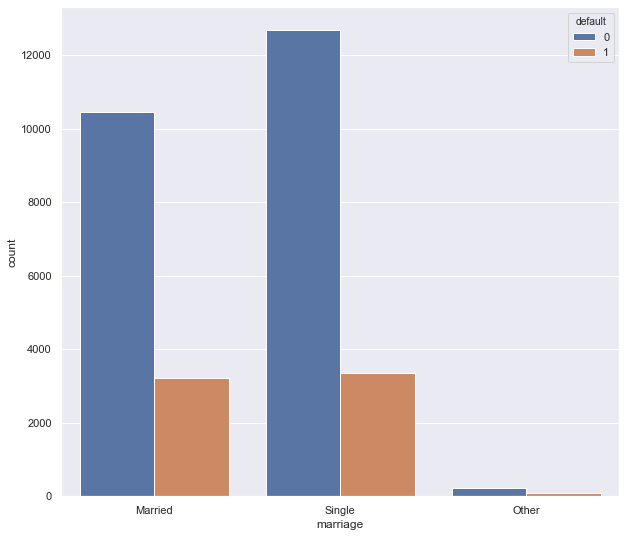

In [44]:
# The marriage and default column.
marriage = sns.countplot(x='marriage', hue='default', data=df)
marriage.set_xticklabels(['Married','Single','Other'])
plt.show()

In [45]:
pd.crosstab(df.marriage, df.default, margins=True)

default,0,1,All
marriage,,,
1,10453,3206,13659
2,12672,3346,16018
3,239,84,323
All,23364,6636,30000


In [46]:
pd.crosstab(df.marriage, df.default, normalize='index', margins=True)

default,0,1
marriage,,
1,0.765283,0.234717
2,0.791110,0.208890
3,0.739938,0.260062
All,0.778800,0.221200


<b>From the preceding output, most defaulters are divorced(26%), followed by the married(23%) people.</b>

In [47]:
df.pay_1.values

array([ 2, -1,  0, ...,  4,  1,  0], dtype=int64)

<b>The Pay_1(the repayment status in the month of September 2005) and default column.
For the pay_1 column, we won't be mapping the values as it won't be visible on the dataframe.
-1=Paid on time, 1=Payment delay for 1 month, 2=Payment delay for 2 months thorough 8. 9 is for 9 months and above.</b>

In [48]:
pd.crosstab(df.pay_1, df.default, margins=True)

default,0,1,All
pay_1,,,
-2,2394,365,2759
-1,4732,954,5686
0,12849,1888,14737
1,2436,1252,3688
2,823,1844,2667
3,78,244,322
4,24,52,76
5,13,13,26
6,5,6,11


<b>From the output of the crosstab function, we can see that the maximum count of defaults falls under subcategory 2—that is, a payment delay for the last 2 months. This implies that a customer who has missed payments for 2 continuous months has a high probability of default.</b>

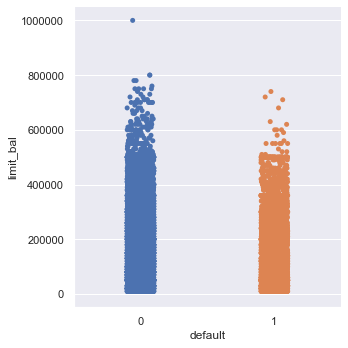

In [49]:
# limit_Balance and default column
"""The balance is the amount given as credit. It includes both the individual consumer's
credit and their family's (supplementary) credit."""
sns.set(rc={'figure.figsize':(15,15)})
sns.catplot(x='default', y='limit_bal', jitter=True, data=df);

<b>From the above plot, we can infer that customers with higher balances have lower likelihood of default than those with lower balance amounts.</b>

In [50]:
pd.crosstab(df.age, df.default).head(10)

default,0,1
age,,
21,53,14
22,391,169
23,684,247
24,827,300
25,884,302
26,1003,253
27,1164,313
28,1123,286
29,1292,313


<b>As we can see from the preceding output, age 27 and 29 have the highest defaults.</b>

In [51]:
pd.crosstab(df.age, df.default, normalize='index', margins=True).head(10)

default,0,1
age,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


<b>From the preceding output, we can see that even though the ages 27 and 29 had
higher counts of defaults, the percentage-wise default count paints a different
picture. Those customers of the age of 22 had a higher percentage of defaulters than
non-defaulters.</b>

In [52]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)

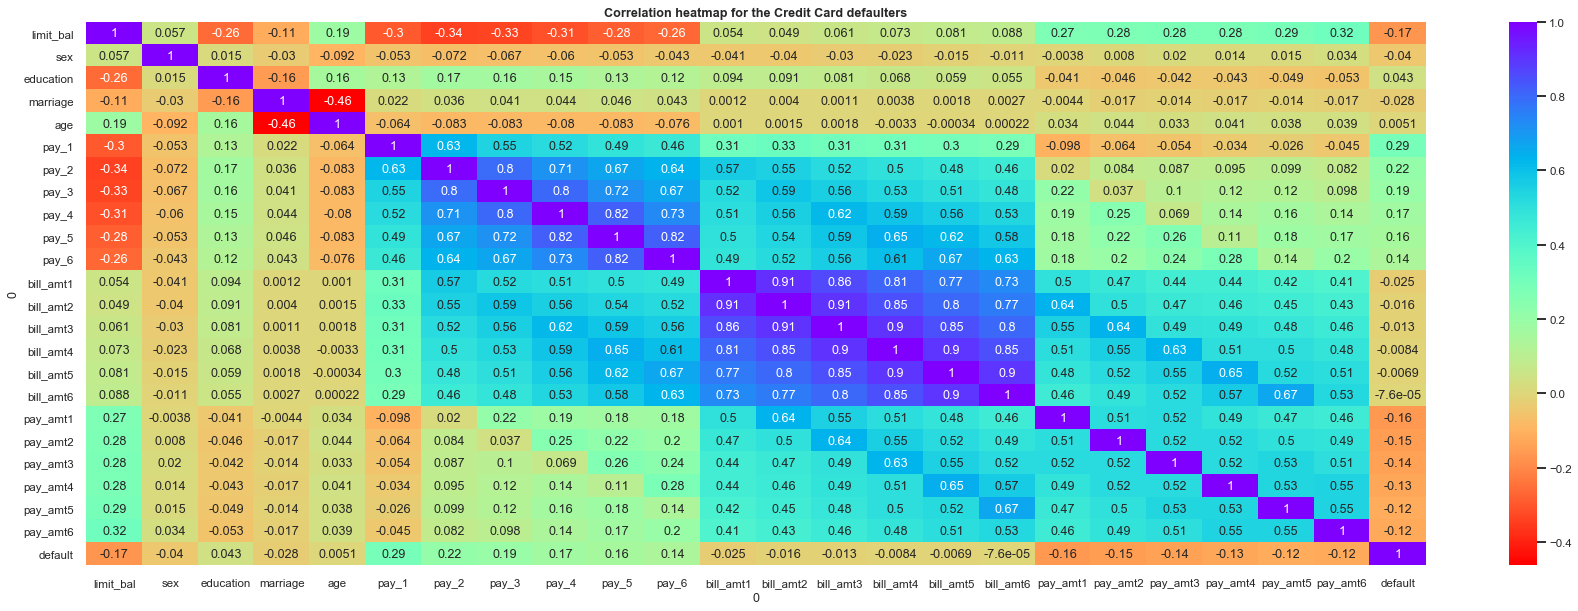

In [53]:
sns.heatmap(df.corr(method='spearman'), \
            cmap='rainbow_r', annot=True)
plt.title("Correlation heatmap for the Credit Card defaulters", weight="bold");

In [54]:
df['age'].corr(df['default'], method='spearman')

0.005148863519844661

In [55]:
def correlation(data):
    for col in data.columns:
        print(col +"  " + str(data[col].corr(data['default'],method='spearman')))
correlation(df)        

limit_bal  -0.16958627777128973
sex  -0.0399605777054416
education  0.0434254664517991
marriage  -0.028174099838732487
age  0.005148863519844661
pay_1  0.2922132153119903
pay_2  0.21691875073932657
pay_3  0.19477122842037808
pay_4  0.17368952787447228
pay_5  0.15904328252424124
pay_6  0.1425232152732447
bill_amt1  -0.025326827533909278
bill_amt2  -0.01555375617850131
bill_amt3  -0.012669908803039634
bill_amt4  -0.008357064590967862
bill_amt5  -0.00685122651830854
bill_amt6  -7.612488787045955e-05
pay_amt1  -0.16049312738844118
pay_amt2  -0.1509773960410106
pay_amt3  -0.13938802702711522
pay_amt4  -0.12797859795409017
pay_amt5  -0.11658708671179431
pay_amt6  -0.12144363905532163
default  1.0


<b>From the preceding output, we can easily conclude that the DEFAULT column has a high positive correlation with PAY_1 (.29), which implies that if a customer has missed a payment in the first month, they have a higher chance of missing further payments in the consecutive months. Also, the DEFAULT column has the highest negative correlation with PAY_AMT1
(-.16), which implies that the higher the payment for the month of September 2005, the lower the chances of default.</b>

### Building A High Risk Profile

<b>As a result of the analysis performed on the dataset, we can now build a profile of the customer who is most likely to default. With this predicted customer profile, credit card companies can take preventive steps (such as reducing credit limits or increasing the rate of interest) and can demand additional collateral from customers who are deemed to be high risk.<br><br>
The customer who satisfies the majority of the following conditions can be classified as a high-risk customer. A high-risk customer is one who has a higher probability of default:<br><br>
• A male customer is more likely to default than a female customer.<br>
• People with a relationship status of other are more likely to default than married or single people.<br>
• A customer whose highest educational qualification is a high-school diploma is more likely to default than a customer who has gone to graduate school or university.<br>
• A customer who has delayed payment for 2 consecutive months has a higher probability of default.<br>
• A customer who is 22 years of age has a higher probability of defaulting on payments than any other age group</b>